<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/svd_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
!git clone https://github.com/xhxuciedu/CS206.git

fatal: destination path 'CS206' already exists and is not an empty directory.


In [4]:
img = cv2.imread('CS206/lenna.jpg')

In [5]:
img.shape

(512, 512, 3)

In [6]:
img = img[:,:,0]

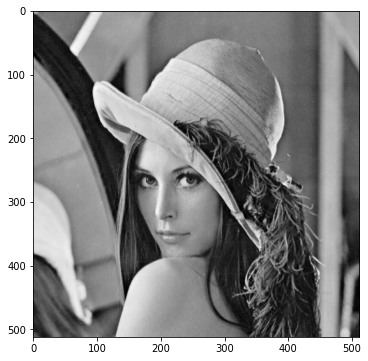

In [7]:
plt.imshow(img, cmap='gray')

## Compress images using SVD
* The original image is represented by matrix $A$.

* First, find SVD of $A$, 
$$A=U\Sigma V^T$$

* Second, reconstruct the image using the top $k$ rank-1 matrices ranked by singular values
$$\bar A = \sum_{i=1}^k \sigma_i u_i v_i^T$$





In [8]:
# find SVD of img
U, sigma, V = np.linalg.svd(img)

In [9]:
U.shape, sigma.shape, V.shape

((512, 512), (512,), (512, 512))

In [26]:
# calculate the norm of the matrix

# induced 2-norm
print('Induced 2-norm:', np.linalg.norm(img, 2))
print(sigma[0])

print('Frobenius norm')
print(np.linalg.norm(img,'fro'))
print(np.sqrt(np.sum(sigma**2)))

Induced 2-norm: 62278.340752429045
77986.32796177549
Frobenius norm
67222.01888518374
91803.34320165034


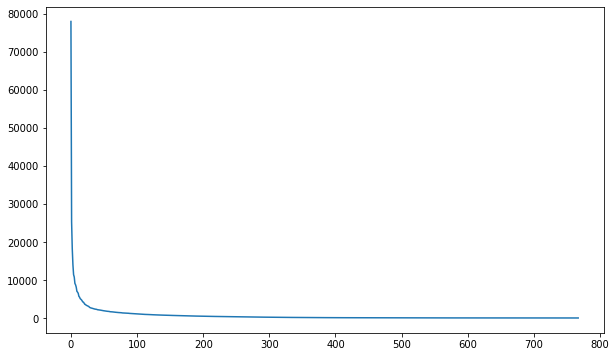

In [27]:
plt.plot(sigma)

(array([702.,  39.,  10.,   5.,   3.,   3.,   1.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([4.07450232e+00, 1.56371957e+03, 3.12336464e+03, 4.68300971e+03,
        6.24265478e+03, 7.80229985e+03, 9.36194492e+03, 1.09215900e+04,
        1.24812351e+04, 1.40408801e+04, 1.56005252e+04, 1.71601703e+04,
        1.87198153e+04, 2.02794604e+04, 2.18391055e+04, 2.33987505e+04,
        2.49583956e+04, 2.65180407e+04, 2.80776857e+04, 2.96373308e+04,
        3.11969759e+04, 3.27566210e+04, 3.43162660e+04, 3.58759111e+04,
        3.74355562e+04, 3.89952012e+04, 4.05548463e+04, 4.21144914e+04,
        4.36741364e+04, 4.52337815e+04, 4.67934266e+04, 4.83530716e+04,
        4.99127167e+04, 5.14723618e+04, 5.30320069e+04, 5.45916519e+04,
        5.

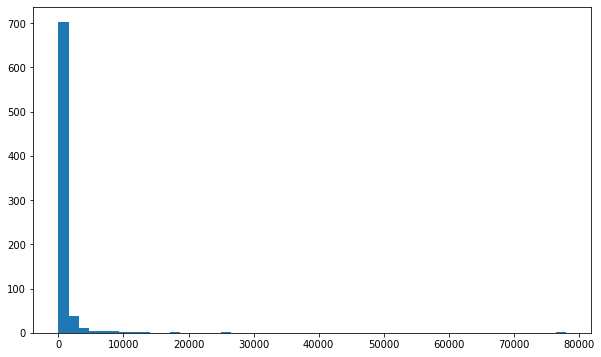

In [28]:
plt.hist(sigma,50)

In [29]:
k = 10
img2 = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])

(-0.5, 1023.5, 767.5, -0.5)

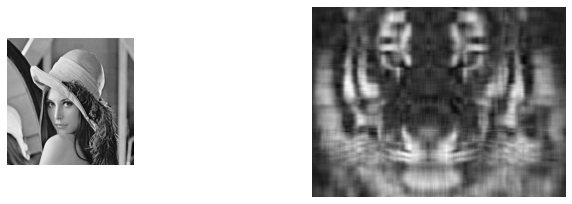

In [30]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(img,cmap='gray')
ax[0].axis('off')
ax[1].imshow(img2,cmap='gray')
ax[1].axis('off')

##SVD Compress Color Images

In [31]:
face = cv2.imread('CS206/tiger-face-close-up.jpg')
face = face[:,:,[2,1,0,]]  # change channel to RGB

In [32]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

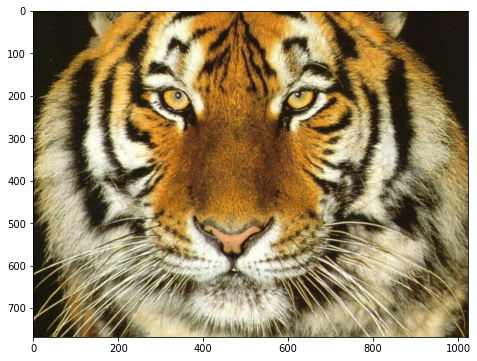

In [33]:
plt.imshow(face)

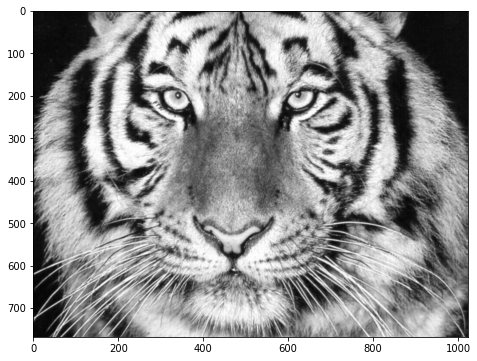

In [34]:
plt.imshow(face[:,:,0],cmap='gray')

In [35]:
U, sigma, V = np.linalg.svd(face[:,:,0])

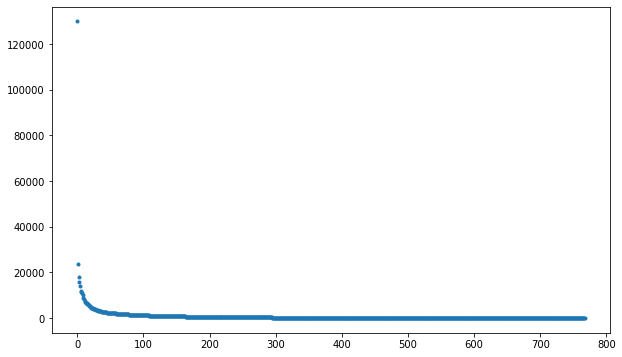

In [36]:
plt.plot(sigma,'.')

(array([675.,  53.,  15.,   6.,   5.,   3.,   2.,   1.,   2.,   1.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.28415149e+00, 1.30205608e+03, 2.60082801e+03, 3.89959993e+03,
        5.19837186e+03, 6.49714379e+03, 7.79591571e+03, 9.09468764e+03,
        1.03934596e+04, 1.16922315e+04, 1.29910034e+04, 1.42897754e+04,
        1.55885473e+04, 1.68873192e+04, 1.81860911e+04, 1.94848631e+04,
        2.07836350e+04, 2.2082

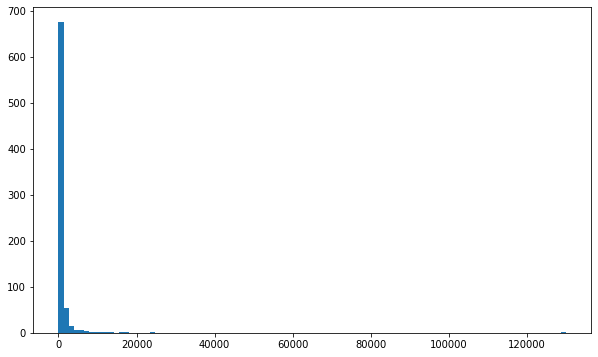

In [37]:
plt.hist(sigma,100)

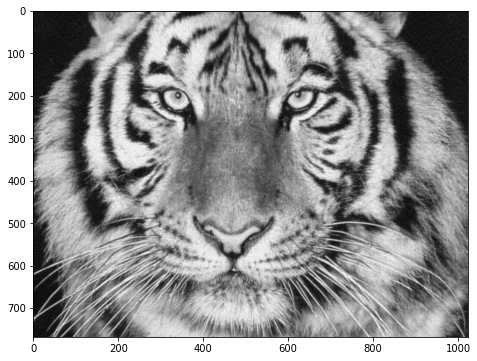

In [38]:
num_components = 150
reconstimg = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

plt.imshow(reconstimg, cmap='gray');

In [39]:
num_components = 50

reimg = np.zeros(face.shape)
for i in range(3):
    U, sigma, V = np.linalg.svd(face[:,:,i])
    reimg[:,:,i] = np.matrix(U[:, :num_components]) * np.diag(sigma[:num_components]) * np.matrix(V[:num_components, :])

In [40]:
reimg[np.where(reimg>=255)]=255
reimg[np.where(reimg<0)]=0

(-0.5, 1023.5, 767.5, -0.5)

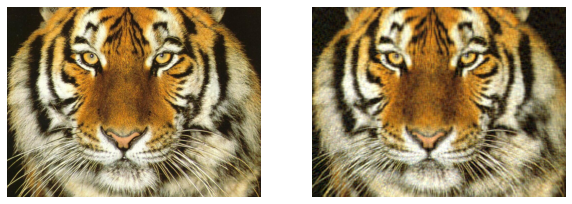

In [41]:
fig,ax = plt.subplots(1,2,sharex=True)
ax[0].imshow(face)
ax[0].axis('off')
ax[1].imshow(reimg.astype(face.dtype))
ax[1].axis('off')